Terminal velocity: 0.000366 m/s
The particle will reach 90.0% of the terminal velocity after 0.00013 seconds and 3e-08 meters

Terminal velocity: 0.03386 m/s
The particle will reach 90.0% of the terminal velocity after 0.03 seconds and 0.0006 meters



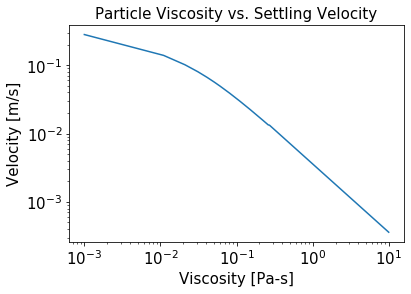

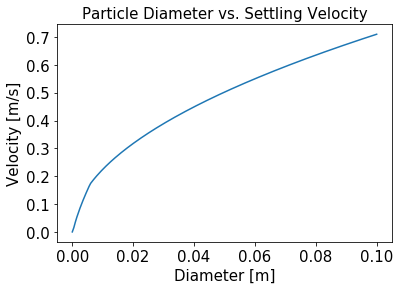

In [299]:
# PROBLEM 1 a) i) ii), b), c), d)   
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# INPUT PARAMETERS (Spherical Particle)
d_p1 = 132e-6 # Particle diameter [m]
rho_p1 = 2650 # Particle density [kg/m^3]
rho1 = 935 # Fluid density [kg/m^3]
mu1 = 44.5e-3 # Fluid viscosity [Pa-s]

d_p2 = 0.000975 # Particle diameter [m]
rho_p2 = 827 # Particle density [kg/m^3]
rho2 = 998 # Fluid density [kg/m^3]
mu2 = 0.001 # Fluid viscosity [Pa-s]
y02 = [0,1e-14] # Initial condition for DiffEq

y01 = [0,1e-14] # Initial condition for DiffEq
tMax = 100 # Maximum dimensionless time for numerical integration
nTime = 100000 # Number of timepoints in numerical integration
g = 9.81 # Gravitational accel [m/s^2]
percent = 90 # Percent of terminal velocity to consider

def term_settling_v(d_p,rho_p,rho,mu,y0):
    # Parse Input Values to calculate needed parameters
    volume = np.pi/6.0*d_p**3 # particle volume
    m = volume*rho_p # particle mass
    A = np.pi/4.0*d_p**2 # spherical surface area
    lc = 2*m/rho/A # characteristic length
    if rho_p > rho:
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
    else:
        tc = np.sqrt(-lc/(1-rho/rho_p)/g)
    uc = lc/tc # characteristic velocity

    def drag_coeff(Re):
        def fun1(Re):
            return 24.0/Re
        def fun2(Re):
            return 24.0/Re*(1+ 0.14*Re**(0.7))
        def fun3(Re):
            return 0.445

        C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                    [fun1, fun2, fun3])
        return C

    def settling(y,t,rho,d,mu,uc):
        z,v = y
        dy_dt = np.zeros_like(y)
        Re = rho*d*v*uc/mu
        C = drag_coeff(Re)
        dy_dt[0] = v
        dy_dt[1] = 1 - C*v**2
        return dy_dt

    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
    z = y[:,0]
    v = y[:,1]

    vt = (v[-1]*uc)

    print('Terminal velocity: %.4g m/s' %(vt))

    # Find the time and distance when the velocity reaches some percent of the terminal velocity
    ind = np.argwhere(v>=percent/100.0*v[-1])
    tPercent = t[ind[0]]*tc
    zPercent = z[ind[0]]*lc
    print('The particle will reach %.1f%% of the terminal velocity after %.2g seconds and %.2g meters\n' %(
        percent,tPercent,zPercent))
    return vt

term_settling_v(d_p1,rho_p1,rho1,mu1,y01)
term_settling_v(d_p2,rho_p2,rho2,mu2,y02)

# b)
 
mu_p = np.linspace(0.001,10,1000) #[Pa-s]
N = len(mu_p)
vel = []

for i in range(N):
    mu1 = mu_p[i]
    vol = np.pi/6.0*d_p**3 #particle volume
    m = vol*rho_p #particle mass
    A = np.pi/4.0*d_p**2 #spherical surface area
    lc = 2*m/rho/A
    tc = np.sqrt(lc/(1-rho/rho_p)/g)
    uc = lc/tc
    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu1,uc))
    z = y[:,0]
    v = y[:,1]
    vt = v[-1]*uc
    
    vel.append(vt)
    
plt.plot(mu_p, vel)
plt.xlabel('Viscosity [Pa-s]',fontsize = 15)
plt.ylabel('Velocity [m/s]', fontsize = 15)
plt.title ('Particle Viscosity vs. Settling Velocity',fontsize = 15 )
plt.xticks (fontsize = 15)
plt.yticks (fontsize = 15)
plt.yscale("log")
plt.xscale("log")
plt.show()

# c) ________________________________________________________

dp = np.linspace(10e-6, 10e-2,200)

N = len(dp)
vel2 = []

for i in range(N):
    dp1 = dp[i]
    vol2 = np.pi/6.0*dp1**3 #particle volume
    m2 = vol2*rho_p2 #particle mass
    A2 = np.pi/4.0*dp1**2 #spherical surface area
    lc2 = 2*m2/rho2/A2
    tc2 = np.sqrt(-lc2/(1-rho2/rho_p2)/g)
    uc2 = lc2/tc2
    t2 = np.linspace(0,tMax,nTime)
    y2 = odeint(settling,y0,t2,args=(rho2,dp1,mu2,uc2))
    z2 = y2[:,0]
    v2 = y2[:,1]
    vt2 = v2[-1]*uc2
    
    vel2.append(vt2)
    
plt.plot(dp, vel2)
plt.title ('Particle Diameter vs. Settling Velocity', fontsize = 15)
plt.ylabel('Velocity [m/s]', fontsize = 15)
plt.xlabel('Diameter [m]', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [197]:
# PROBELM 2 a) 
from scipy.optimize import fsolve
#d_p3 =  8.908e-6 # Particle diameter [m]

Q = 45.2e-3/60
A = 6.75

ut_min = Q/A

def terminal_settling_v(d_p):
    rho_p = 3950 # Particle density [kg/m^3]
    rho = 1594 # Fluid density [kg/m^3]
    mu = 0.913e-3 # Fluid viscosity [Pa-s]
    y0 = [0,1e-5] # Initial condition for DiffEq
    
    # Parse Input Values to calculate needed parameters
    volume = np.pi/6.0*d_p**3 # particle volume
    m = volume*rho_p # particle mass
    A = np.pi/4.0*d_p**2 # spherical surface area
    lc = 2*m/rho/A # characteristic length
    if rho_p > rho:
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
    else:
        tc = np.sqrt(-lc/(1-rho/rho_p)/g)
    uc = lc/tc # characteristic velocity

    def drag_coeff(Re):
        def fun1(Re):
            return 24.0/Re
        def fun2(Re):
            return 24.0/Re*(1+ 0.14*Re**(0.7))
        def fun3(Re):
            return 0.445
        C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                    [fun1, fun2, fun3])
        return C

    def settling(y,t,rho,d,mu,uc):
        z,v = y
        dy_dt = np.zeros_like(y)
        Re = rho*d*v*uc/mu
        C = drag_coeff(Re)
        dy_dt[0] = v
        dy_dt[1] = 1 - C*v**2
        return dy_dt

    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
    z = y[:,0]
    v = y[:,1]

    vt = (v[-1]*uc)
    return vt - ut_min

a = fsolve(terminal_settling_v,9e-6)
print("Diameter corresponding to min terminal velocity is: %.5g" %a)
    



Diameter corresponding to min terminal velocity is: 8.9082e-06


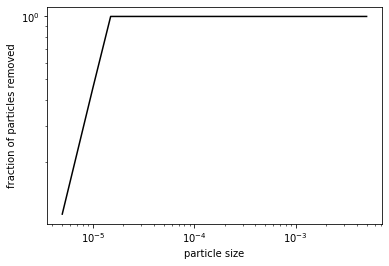

In [292]:
# PROBELM 2 b) 
from math import log10

phi = 0.198
mu = 0.913e-3 # [Pa-s]

Q = 45.2e-3/60
A = 6.75

ut_min = Q/A

def terminal_settling_v(d_p):
    rho_p = 3950 # Particle density [kg/m^3]
    rho = 1594 # Fluid density [kg/m^3]
    mu = 0.913e-3 # Fluid viscosity [Pa-s]
    y0 = [0,1e-14] # Initial condition for DiffEq
    tMax = 3 # Maximum dimensionless time for numerical integration
    nTime = 1000 # Number of timepoints in numerical integration

    
    # Parse Input Values to calculate needed parameters
    volume = np.pi/6.0*d_p**3 # particle volume
    m = volume*rho_p # particle mass
    A = np.pi/4.0*d_p**2 # spherical surface area
    lc = 2*m/rho/A # characteristic length
    if rho_p > rho:
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
    else:
        tc = np.sqrt(-lc/(1-rho/rho_p)/g)
    uc = lc/tc # characteristic velocity

    def drag_coeff(Re):
        def fun1(Re):
            return 24.0/Re
        def fun2(Re):
            return 24.0/Re*(1+ 0.14*Re**(0.7))
        def fun3(Re):
            return 0.445
        C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                    [fun1, fun2, fun3])
        return C

    def settling(y,t,rho,d,mu,uc):
        z,v = y
        dy_dt = np.zeros_like(y)
        Re = rho*d*v*uc/mu
        C = drag_coeff(Re)
        dy_dt[0] = v
        dy_dt[1] = 1 - C*v**2
        return dy_dt

    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
    z = y[:,0]
    v = y[:,1]

    vt_isolated = (v[-1]*uc)
    Re = rho*vt_isolated*d_p/2/mu
    vt_group = vt_isolated*(1-phi)**(3.575-1.075*np.tanh(0.6516*(np.log10(Re)-1.153)))
    #print(vt_group)
    if vt_group/ut_min > 1:
        frac = 1
    else:
        frac = vt_group/ut_min
    
    return frac

size_p = np.linspace(5e-6,5e-3,1000)
fraction = []

for i in size_p:
    fraction.append(terminal_settling_v(i))
    
#print(fraction)
plt.plot(size_p, fraction,"k-")  
plt.xlabel("particle size")
plt.ylabel("fraction of particles removed")
plt.xscale("log")
plt.yscale("log")
plt.show()



In [262]:
# PROBLEM 2 c) 
import csv
diameter = []
feed = []

with open('HW3-2 Data.csv','r') as file: 
    data = csv.reader(file, delimiter = ',')
    file.readline() #skip first two lines with no useful data
    file.readline()
    for row in data:
        diameter.append(float(row[0])*1e-6)
        feed.append(float(row[1]))
        
u_hindered = []

def hindered_velocity(d_p):
    rho_p = 3950 # Particle density [kg/m^3]
    rho = 1594 # Fluid density [kg/m^3]
    mu = 0.913e-3 # Fluid viscosity [Pa-s]
    y0 = [0,1e-14] # Initial condition for DiffEq
    tMax = 3 # Maximum dimensionless time for numerical integration
    nTime = 1000 # Number of timepoints in numerical integration

    
    # Parse Input Values to calculate needed parameters
    volume = np.pi/6.0*d_p**3 # particle volume
    m = volume*rho_p # particle mass
    A = np.pi/4.0*d_p**2 # spherical surface area
    lc = 2*m/rho/A # characteristic length
    if rho_p > rho:
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
    else:
        tc = np.sqrt(-lc/(1-rho/rho_p)/g)
    uc = lc/tc # characteristic velocity

    def drag_coeff(Re):
        def fun1(Re):
            return 24.0/Re
        def fun2(Re):
            return 24.0/Re*(1+ 0.14*Re**(0.7))
        def fun3(Re):
            return 0.445
        C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                    [fun1, fun2, fun3])
        return C

    def settling(y,t,rho,d,mu,uc):
        z,v = y
        dy_dt = np.zeros_like(y)
        Re = rho*d*v*uc/mu
        C = drag_coeff(Re)
        dy_dt[0] = v
        dy_dt[1] = 1 - C*v**2
        return dy_dt

    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
    z = y[:,0]
    v = y[:,1]

    vt_isolated = (v[-1]*uc)
    Re = rho*vt_isolated*d_p/2/mu
    vt_group = vt_isolated*(1-phi)**(3.575-1.075*np.tanh(0.6516*(np.log10(Re)-1.153)))
    u_hindered = vt_group
    
    return u_hindered

thing = []

for d in diameter:
    u_hindered.append(hindered_velocity(d))
    
for u in u_hindered:
    if (u/ut_min) > 1:
        thing.append(1)
    elif (u/ut_min) < 1:
        thing.append(u/ut_min)
    else:
        thing.append(0)
    
print(thing)
#print(u_hindered)

print("all of particles settle out and none are left in the outflow")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
all of particles settle out and none are left in the outflow


In [184]:
# PROBLEM 3 a) 
d_p = 405e-6
rho_p = 2650 # Particle density [kg/m^3]
rho = 998 # Fluid density [kg/m^3]
mu = 0.001 # Fluid viscosity [Pa-s]
y0 = [0,1e-5] # Initial condition for DiffEq

# Parse Input Values to calculate needed parameters
volume = np.pi/6.0*d_p**3 # particle volume
m = volume*rho_p # particle mass
A = np.pi/4.0*d_p**2 # spherical surface area
lc = 2*m/rho/A # characteristic length
if rho_p > rho:
    tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
else:
    tc = np.sqrt(-lc/(1-rho/rho_p)/g)
uc = lc/tc # characteristic velocity

def settling(y,t,rho,d,mu,uc):
    z,v = y
    dy_dt = np.zeros_like(y)
    Re = rho*d*v*uc/mu
    C = 24/Re*(1+0.26465*Re**0.5693)+1.31255/(1+958.26/Re)
    dy_dt[0] = v
    dy_dt[1] = 1 - C*v**2
    return dy_dt

t = np.linspace(0,tMax,nTime)
y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
z = y[:,0]
v = y[:,1]

vt_isolated = (v[-1]*uc)
elutriation_v = vt_isolated

print(elutriation_v)

0.05671975821059844


In [266]:
# PROBLEM 3 c) 
elutriation_v = 0.05671975821059844

def terminal_settling_v(d_p):
    rho_p = 7500 # Particle density [kg/m^3]
    rho = 998 # Fluid density [kg/m^3]
    mu = 0.001 # Fluid viscosity [Pa-s]
    y0 = [0,1e-14] # Initial condition for DiffEq
    
    # Parse Input Values to calculate needed parameters
    volume = np.pi/6.0*d_p**3 # particle volume
    m = volume*rho_p # particle mass
    A = np.pi/4.0*d_p**2 # spherical surface area
    lc = 2*m/rho/A # characteristic length
    if rho_p > rho:
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
    else:
        tc = np.sqrt(-lc/(1-rho/rho_p)/g)
    uc = lc/tc # characteristic velocity

    def settling(y,t,rho,d,mu,uc):
        z,v = y
        dy_dt = np.zeros_like(y)
        Re = rho*d*v*uc/mu
        C = 24/Re*(1+0.26465*Re**0.5693)+1.31255/(1+958.26/Re)
        dy_dt[0] = v
        dy_dt[1] = 1 - C*v**2
        return dy_dt

    t = np.linspace(0,tMax,nTime)
    y = odeint(settling,y0,t,args=(rho,d_p,mu,uc))
    z = y[:,0]
    v = y[:,1]

    vt = (v[-1]*uc)
    return vt - elutriation_v

a = fsolve(terminal_settling_v,1e-4)
print("Diameter of galena corresponding to elutriation velocity: %.5g" %a)
    

Diameter of galena corresponding to elutriation velocity: 0.00017864


a) Pressure Drop: 25.3


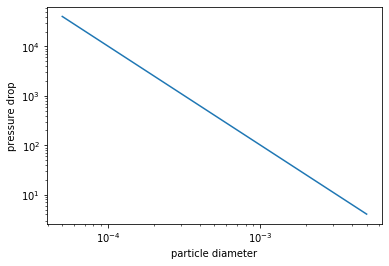

d) Porosity: 0.36493


In [293]:
# PROBLEM 4 a) 
from scipy.optimize import fsolve
phi = 0.498
E = 1 - phi
rho_f = 998 #[kg/m^3]
mu = 0.00113 #[pa-s]
Q = 0.001932/3600 # [m^3/s]
D = 75e-3 #[m]
psi = 0.775
L = 1.5 #[m]
A = np.pi*D**2/4
d_p = 2e-3 #[m]
Re = rho_f*d_p*Q/mu/A

dP = (1-E)/(E**3*psi*d_p**2)*((150*(1-E)/psi+1.75*Re)*mu*L*Q/A)
print("a) Pressure Drop: %.5g" %dP)

# b) ____________________________________________________________________

def pressure_calc(d_p):
    dP = (1-E)/(E**3*psi*d_p**2)*((150*(1-E)/psi+1.75*Re)*mu*L*Q/A)
    return dP
    
particle_diam = np.linspace(50e-6,5e-3,100)
p_drop = []

for i in particle_diam:
    p_drop.append(pressure_calc(i))

plt.loglog(particle_diam, p_drop)
plt.xlabel("particle diameter")
plt.ylabel("pressure drop")
plt.show()

# d)_____________________________________________________________________

Re2 = rho_f*(573e-6)*Q/mu/A
psi = 1
    
def solve_me(E):
    return (1-E)/(E**3*psi*(573e-6)**2)*((150*(1-E)/psi+1.75*Re2)*mu*L*Q/A) - 781.5

print("d) Porosity: %.5g" %fsolve(solve_me,0.3))

The critical velocity is 0.000112 m/s.


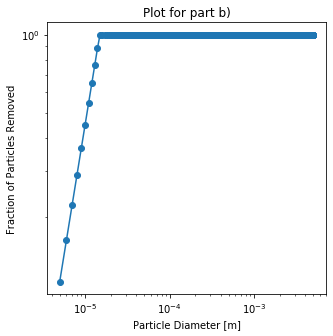

<Figure size 432x288 with 0 Axes>

In [270]:
# AMELIA 2 b) 
def main():

    # critical velocity = Q/A
    Q = 45.2/1000/60 # flow rate [m^3/s]
    A = 6.75 # cross-sectional settling area [m^2]

    u_crit = Q/A
    print(f'The critical velocity is {u_crit:.3g} m/s.')
    
    # INPUT PARAMETERS (Spherical Particle)
    rho_p = 3950 # Particle density [kg/m^3]
    rho = 1594 # Fluid density [kg/m^3]
    mu = 0.913e-3 # Fluid viscosity [Pa-s]
    g = 9.81 # Gravitational constant [m/s^2]
    phi = 0.198 # Volume fraction of particles in feed [-]
    
    y0 = [0,1e-8] # Initial condition for DiffEq
    tMax = 3 # Maximum dimensionless time for numerical integration
    nTime = 1000 # Number of timepoints in numerical integration

    dList = np.linspace(5e-6, 5e-3, 5000) # particle diameters [m]
    
    ut0List = []
    utList = []
    xList = []
    for d_p in dList:
        # Parse Input Values to calculate needed parameters
        volume = np.pi/6.0*d_p**3 # particle volume
        m = volume*rho_p # particle mass
        A = np.pi/4.0*d_p**2 # spherical surface area
        lc = 2*m/rho/A # characteristic length
        tc = np.sqrt(lc/(1-rho/rho_p)/g) # characteristic time
        uc = lc/tc # characteristic velocity

        t = np.linspace(0,tMax,nTime)
        data = rho,d_p,mu,uc
        y = odeint(settling,y0,t,args=data)
        z = y[:,0]
        u = y[:,1]
        
        ut0 = u[-1]*uc
        ut0List.append(ut0)

        data = rho_p,rho,mu,g,d_p,ut0,phi
        ut = float(fsolve(cal_u, ut0, args=data))
        
        utList.append(ut)

        x = ut/u_crit
        if x > 1:
            x = 1
            
        xList.append(x)

    # plot results
    plt.figure(figsize=(5,5))
    plt.title('Plot for part b)')
    plt.plot(dList,xList,'-o')
    
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel('Particle Diameter [m]')
    plt.ylabel('Fraction of Particles Removed')

    plt.show()
    plt.tight_layout()
    
def cal_C(Re):
    """
    Define a piecewise function for the drag coefficient as it changes with Reynolds number.
    NOTE: returns a callable function.
    """
    def fun1(Re):
        return 24.0/Re
    def fun2(Re):
        return 24.0/Re*(1+ 0.14*Re**(0.7))
    def fun3(Re):
        return 0.445
    
    C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                [fun1, fun2, fun3])
    return C

def settling(y,t, *data):
    """
    Define the system of first order differential equations corresponding to a settling sphere.
    The inputs and outputs of this function follow the requirements of the "odeint" function.
    """
    rho,d,mu,uc = data
    z,u = y # z = y[0], u = y[1]
    dy_dt = np.zeros_like(y)
    Re = rho*d*u*uc/mu
    C = cal_C(Re)
    dy_dt[0] = u
    dy_dt[1] = 1 - C*u**2
    return dy_dt

def cal_u(u, *data):
    """
    root = 0 when v = terminal velocity
    """
    rho_p,rho,mu,g,d_p,ut0,phi = data
    Re = rho*d_p*ut0/mu
    n = 3.575-1.075*np.tanh(0.6516*np.log10(Re)-1.153)
    RHS = ut0*(1-phi)**n
    
    root = u - RHS
    
    return root

main()

In [274]:
# AMELIA 2a) 
def main():
    # critical velocity = Q/A
    Q = 45.2/1000/60 # flow rate [m^3/s]
    A = 6.75 # cross-sectional settling area [m^2]

    u_crit = Q/A
    print(f'The critical velocity is {u_crit:.3g} m/s.')

    # INPUT PARAMETERS (Spherical Particle)
    rho_p = 3950 # Particle density [kg/m^3]
    rho = 1594 # Fluid density [kg/m^3]
    mu = 0.913e-3 # Fluid viscosity [Pa-s]
    g = 9.81 # Gravitational constant [m/s^2]
    d0 = 0.001 # Initial guess for particle diameter [m]
    
    data = rho_p,rho,mu,g,u_crit
    d_p = fsolve(cal_d,d0,args=data)
    d_p = float(d_p)
    #print(d_p)
    print(f'The minimum particle diameter is {d_p:.3g} m.')

def cal_C(Re):
    """
    Define a piecewise function for the drag coefficient as it changes with Reynolds number.
    NOTE: returns a callable function.
    """
    def fun1(Re):
        return 24.0/Re
    def fun2(Re):
        return 24.0/Re*(1+ 0.14*Re**(0.7))
    def fun3(Re):
        return 0.445
    
    C = np.piecewise(Re,[(Re<0.1),(Re>=0.1) & (Re<1e3),(Re>=1e3)],
                [fun1, fun2, fun3])
    return C

def cal_d(d_p, *data):
    """
    root = 0 when v = terminal velocity
    """
    rho_p,rho,mu,g,u = data
    Re = rho*d_p*u/mu
    C = cal_C(Re)
    
    zero = d_p*g*(rho_p - rho)/3 - C*rho*u**2/4
    
    return zero
  
main()

The critical velocity is 0.000112 m/s.
The minimum particle diameter is 8.91e-06 m.
